In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 1000   # Number of individuals in each generation
num_parents = 500        # Number of parents selected to breed
num_variables = 10        # Number of parameters to optimize (dimensions for Rastrigin)
num_generations = 5000    # Number of generations
crossover_rate = 0.8     # Probability of crossover
mutation_rate = 0.01     # Probability of mutation
mutation_range = 1       # Range of mutation

# Range for Rastrigin function variables (-5.12 to 5.12 for each variable)
variable_range = (-5.12, 5.12)

# Initialize population with random real numbers within the range
population = np.random.uniform(variable_range[0], variable_range[1], size=(population_size, num_variables))

def rastrigin(x): 
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def calculate_fitness(population):
    fitness = np.array([rastrigin(individual) for individual in population])
    return fitness

def crossover(parents, crossover_rate, population_size):
    num_parents = parents.shape[0]
    num_variables = parents.shape[1]

    offspring_population = np.zeros((population_size, num_variables))
    current_count = 0

    while current_count < population_size:
        shuffled_indices = np.random.permutation(num_parents)
        shuffled_parents = parents[shuffled_indices, :]

        for i in range(0, num_parents, 2):
            if current_count >= population_size:
                break

            if i == num_parents - 1:
                offspring_population[current_count, :] = shuffled_parents[i, :]
                current_count += 1
            else:
                parent1 = shuffled_parents[i, :]
                parent2 = shuffled_parents[i + 1, :]

                if np.random.rand() < crossover_rate:
                    crossover_point = np.random.randint(1, num_variables)
                    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
                else:
                    offspring1 = parent1
                    offspring2 = parent2

                offspring_population[current_count, :] = offspring1
                current_count += 1

                if current_count < population_size:
                    offspring_population[current_count, :] = offspring2
                    current_count += 1

    return offspring_population

def mutate(new_population, mutation_rate, mutation_range):
    population_size = new_population.shape[0]
    num_variables = new_population.shape[1]

    mutated_population = new_population.copy()

    for i in range(population_size):
        for j in range(num_variables):
            if np.random.rand() < mutation_rate:
                mutation_value = (np.random.rand() - 0.5) * 2 * mutation_range
                mutated_population[i, j] = mutated_population[i, j] + mutation_value
                mutated_population[i, j] = max(variable_range[0], min(variable_range[1], mutated_population[i, j]))

    return mutated_population

fit_plot = np.zeros(num_generations)

for i in range(num_generations):
    fitness = calculate_fitness(population)
    if np.min(fitness) <= 0.01:
        break
    parents = population[np.argsort(fitness)[:num_parents]]         # min :numparents  max -num_parents:
#    parents = population[np.argsort(fitness)[-num_parents:]]

    offspring_population = crossover(parents, crossover_rate, population_size)
    population = mutate(offspring_population, mutation_rate, mutation_range)

    best_fitness = np.min(fitness)  # min / max 
    fit_plot[i] = best_fitness
   # print(f"Generation {generation}: Best Fitness = {best_fitness:.4f}")



In [48]:
best_solution = population[np.argmin(fitness)]
print(f"\nBest solution found: {best_solution}")
print(f"Fitness value: {rastrigin(best_solution):.4f}")


Best solution found: [ 5.62887922e-04 -1.93610607e-03  1.83522417e-03 -1.99008915e-03
  2.47340213e-03 -3.74042661e-03 -1.79773618e-03  9.28151812e-05
  3.35564103e-03  1.41322876e-04]
Fitness value: 0.0091



Best solution found: [ 5.62887922e-04 -1.93610607e-03  1.83522417e-03 -1.99008915e-03
  2.47340213e-03 -3.74042661e-03 -1.79773618e-03  9.28151812e-05
  3.35564103e-03  1.41322876e-04]
Fitness value: 0.0091


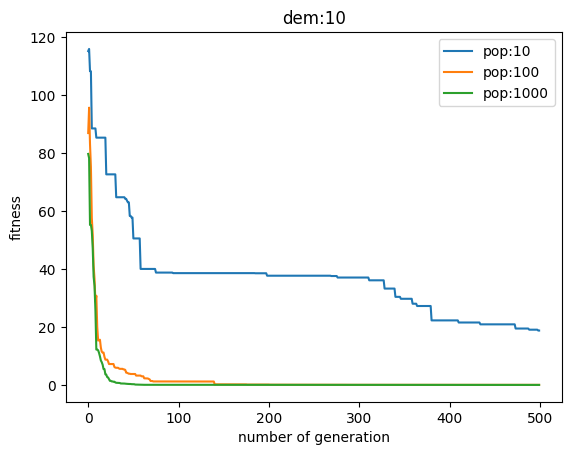

In [49]:
#a=fit_plot
#b=fit_plot
c=fit_plot

plt.plot(a,label="pop:10")
plt.plot(b, label="pop:100")
plt.plot(c,label="pop:1000")
plt.ylabel("fitness")
plt.xlabel("number of generation")
plt.title("dem:10")
plt.legend()
best_solution = population[np.argmin(fitness)]
print(f"\nBest solution found: {best_solution}")
print(f"Fitness value: {rastrigin(best_solution):.4f}")

In [ ]:
c= fit_plot

plt.plot(c,label="pop:1000")
plt.ylabel("fitness")
plt.xlabel("number of generation")
plt.title("dem:10 ")
plt.legend()